In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import atan2, pi, sqrt
from skimage import io 
from skimage.util import img_as_ubyte
from skimage.filters import sobel, gaussian, median
from skimage.morphology import disk
from matplotlib import pyplot as plt
# f = cv2.imread(r"D:\Programming\VS Code\Python\pdc\trainData\f.jpg")
# f = cv2.imread(r"D:\Programming\VS Code\Python\pdc\trainData\l.jpg")
# r = cv2.imread(r"D:\Programming\VS Code\Python\pdc\trainData\r.jpg")
# s = cv2.imread(r"D:\Programming\VS Code\Python\pdc\trainData\s.jpg")
# b = cv2.imread(r"D:\Programming\VS Code\Python\pdc\trainData\b.jpg")
# f= cv2.resize(f, (60,60))
# f = cv2.cvtColor(f, cv2.COLOR_BGR2HSV)
# # cv2.imshow('f',f)
# min_HSV = np.array([0, 58, 30], dtype = "uint8")
# max_HSV = np.array([33, 255, 255], dtype = "uint8")
# f2 = cv2.inRange(f, min_HSV, max_HSV)
# f2 = f2.transpose()
# print(f2)


def direc(f):
    cnt = 0
    start = 0
    r, r1 = 1, 1
    ln = 1
    sm = 0
    for i in f:
        if 255 in i:
            ind = np.where(i==255)
            # print(ind[0])
            sm += (ind[0][0]+ind[0][-1])//2
            # print((ind[0][0]+ind[0][-1])//2)
            if cnt==0:
                ln = len(ind[0])
                start = (ind[0][0]+ind[0][-1])//2
                r1 = r
                cnt = 1
            ln1 = len(ind[0])
            if ln1 > 3*ln:
                mid = (ind[0][0]+ind[0][-1])//2
                # p1 = (100+start, 50+r1)
                # p2 = (100+mid, 50+r)
                p1 = (100+((start*200)//60),50+((r1*200)//60))
                p2 = (100+((mid*200)//60),50+((r*200)//60))
                # cv2.line(frame1, p1, p2, (0,0,0), 2)
                # cv2.putText(frame1, 'Start', p1, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,250), 2, cv2.LINE_AA)
                angle = abs(round(atan2(p1[1]-p2[1], p1[0]-p2[0])*(180/pi), 2))
                # print(angle)
                # print(r1,r)
                # print(sm//(r-r1))
                dist = ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5
                return dist

            # prev = mid

            # print(len(ind[0]))
        r+=1
    return 0.0

vid = cv2.VideoCapture(0)
while True:
    _ , frame = vid.read()
    frame = cv2.flip(frame,2)

    # cv2.imshow('f',f)
    cv2.rectangle(frame,(100,50),(300,250),(0, 0, 0),2)
    # cv2.imshow('Video', frame)
    f = frame[50:251,100:301]
    f= cv2.resize(f, (60,60))
    # f= cv2.cvtColor(f, cv2.COLOR_BGR2GRAY)
    f = cv2.cvtColor(f, cv2.COLOR_BGR2HSV)
    # f = sobel(f)
    # f = img_as_ubyte(f)
    # with open(r"D:\Programming\VS Code\Python\pdc\trainData\img2.txt", 'w') as fl:
    #     for i in f:
    #         fl.write(str(i)+'\n')
    min_HSV = np.array([0, 58, 30], dtype = "uint8")
    max_HSV = np.array([33, 255, 255], dtype = "uint8")
    f = cv2.inRange(f, min_HSV, max_HSV)
    # f = median(f, disk(3), mode = "constant", cval = 0.0)
    # f = gaussian(f, sigma=1, mode = "constant", cval = 0.0)
    # cnt = 0
    # start = 0
    # r, r1 = 1, 1
    # ln = 1
    sm = 0
    
    '''#front
    frame1 = frame.copy()
    for i in f:
        if 255 in i:
            ind = np.where(i==255)
            # print(ind[0])
            sm += (ind[0][0]+ind[0][-1])//2
            print((ind[0][0]+ind[0][-1])//2)
            if cnt==0:
                ln = len(ind[0])
                start = (ind[0][0]+ind[0][-1])//2
                r1 = r
                cnt = 1
            ln1 = len(ind[0])
            if ln1 > 3*ln:
                mid = (ind[0][0]+ind[0][-1])//2
                # p1 = (100+start, 50+r1)
                # p2 = (100+mid, 50+r)
                p1 = (100+((start*200)//60),50+((r1*200)//60))
                p2 = (100+((mid*200)//60),50+((r*200)//60))
                cv2.line(frame1, p1, p2, (0,0,0), 2)
                cv2.putText(frame1, 'Start', p1, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,250), 2, cv2.LINE_AA)
                angle = abs(round(atan2(p1[1]-p2[1], p1[0]-p2[0])*(180/pi), 2))
                print(angle)
                print(r1,r)
                print(sm//(r-r1))
                break

            # prev = mid

            # print(len(ind[0]))
        r+=1

    # #left
    cnt = 0
    start = 0
    r, r1 = 1, 1
    ln = 1
    sm = 0
    frame2 = frame.copy()
    f1 = f.transpose()
    for i in f:
        if 255 in i:
            ind = np.where(i==255)
            # print(ind[0])
            sm += (ind[0][0]+ind[0][-1])//2
            print((ind[0][0]+ind[0][-1])//2)
            if cnt==0:
                ln = len(ind[0])
                start = (ind[0][0]+ind[0][-1])//2
                # cv2.line(frame2, (100+r1, 50+start), (100+r1, 50+start), (0,0,0), 10)
                r1 = r
                cnt = 1
            ln1 = len(ind[0])
            if ln1 > 3*ln:
                mid = (ind[0][0]+ind[0][-1])//2
                p1 = (100+((r1*200)//60), 50+((start*200)//60))
                p2 = (100+((r*200)//60), 50+((mid*200)//60))
                cv2.line(frame2, p1, p2, (0,0,0), 2)
                cv2.putText(frame2, 'Start', p1, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,250), 2, cv2.LINE_AA)
                angle = abs(round(atan2(p1[1]-p2[1], p1[0]-p2[0])*(180/pi), 2))
                print(angle)
                print(r1,r)
                print(sm//(r-r1))
                break
            # prev = mid

            # print(len(ind[0]))
        r+=1

    # #right
    cnt = 0
    start = 0
    r, r1 = 1, 1
    ln = 1
    sm = 0
    frame3 = frame.copy()
    f2 = f.transpose()
    for i in f2[::-1]:
        if 255 in i:
            ind = np.where(i==255)
            # print(ind[0])
            sm += (ind[0][0]+ind[0][-1])//2
            print((ind[0][0]+ind[0][-1])//2)
            if cnt==0:
                ln = len(ind[0])
                start = (ind[0][0]+ind[0][-1])//2
                # cv2.line(frame3, (100+r1, 50+start), (100+r1, 50+start), (0,0,0), 10)
                r1 = r
                cnt = 1
            ln1 = len(ind[0])
            if ln1 > 3*ln:
                mid = (ind[0][0]+ind[0][-1])//2
                p1 = (100+((mid*200)//60),50+((r1*200)//60))
                p2 = (100+((start*200)//60), 50+((r*200)//60))
                cv2.line(frame3, p1, p2, (0,0,0), 2)
                cv2.putText(frame3, 'Start', p1, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,250), 2, cv2.LINE_AA)
                angle = abs(round(atan2(p1[1]-p2[1], p1[0]-p2[0])*(180/pi), 2))
                print(angle)
                print(r1,r)
                print(sm//(r-r1))
                break
            # prev = mid

            # print(len(ind[0]))
        r+=1'''
    f1 = f.copy()
    for k in range(1):
        r = 0
        for i in f[:-1]:
            if 255 in i:
                ind = np.where(i==255)[0]
                sm += ind.shape[0]
                for j in ind[:-1]:
                    f[r][j-1]=f[r][j+1]=f[r-1][j]=f[r-1][j-1]=f[r-1][j+1]=255
                    # f[r][j-1]=f[r-1][j]=f[r-1][j-1]=255
            r+=1
        # f = f[::-1]

    # #stop
    # cnt = 0
    # start = 0
    # r, r1 = 1, 1
    # ln = 1
    # sm = 0
    frame4 = frame.copy()
    # f1 = f.transpose()
    '''maxfing = 0
    for i in f:
        fing=1
        if 255 in i:
            ind = np.where(i==255)
            
            for j in range(1,ind[0].shape[0]-1):
                if ind[0][j]-ind[0][j-1] > 3 and ind[0][j+1]-ind[0][j]==1:
                    fing += 1
                prev = j
        maxfing = max(maxfing, fing)
            # prev = mid
            # print(len(ind[0]))
        # r+=1'''
        
    maxfing = 0
    for i in f[:20]:
        fing=0
        if 255 in i:
            ind = np.where(i==255)[0]
            ln = ind.shape[0]
            for j in range(ln-6):
                # print(1)
                if [ind[j], ind[j+1], ind[j+2], ind[j+3], ind[j+4], ind[j+5]] == [ind[j], ind[j]+1, ind[j]+2, ind[j]+3, ind[j]+4, ind[j]+5]:
                    # print(2)
                    fing += 1
        maxfing = max(maxfing, fing)



    print("MAX FING COUNT : ",maxfing)
    print(sm)
    front = round(direc(f) , 2)
    left = round(direc(f.transpose()), 2)
    right = round(direc(f.transpose()[::-1]), 2)
    print(front, left, right, maxfing, sep='\t')

    dir_dict = {front : 'front', left: 'left', right: 'right'}
    mx_dir = dir_dict[max(dir_dict)]
    
    if sm<300 or sm>1500 or max(dir_dict)==0:
        print("none")
    elif maxfing>4 and maxfing<16:
        print("stop")
    elif maxfing in (2,3,4):
        print("back")
    else:
        # dir_dict = {front : 'FRONT', left: 'LEFT', right: 'RIGHT'}
        # mx_dir = dir_dict[max(dir_dict)]
        print(mx_dir)

    #border
    # for i in f2:
    #     if 255 in i:
    #         ind = np.where(i==255)
    #         if cnt==0:
    #             prev = ind[0][0]
    #             cnt = 1
    #         cv2.line(frame,(100+prev, 50+r-1),(100+ind[0][0], 50+r), (0,0,0), 2)
    #         prev = ind[0][0]
    #     r+=1

    # cv2.imshow('Front', frame1)
    # cv2.imshow('Left', frame2)
    cv2.imshow('Main Frame', frame)
    cv2.imshow('bg_frame', f)
    cv2.imshow('bg_frame1', f1)
    if cv2.waitKey(0) & 0XFF==ord('q'):
        break

vid.release()
cv2.destroyAllWindows()

# plt.plot(f2, f2, color='red')
# plt.show()
# cv2.imshow('f2',f2)
# f1 = cv2.cvtColor(f, cv2.COLOR_BGR2YCR_CB)
# cv2.imshow('f1',f1)
# cv2.waitKey(0)
# im = plt.imshow(f)
# plt.show()


MAX FING COUNT :  0
0
0.0	0.0	0.0	0
none
MAX FING COUNT :  0
303
22.36	14.32	44.72	0
right
MAX FING COUNT :  0
101
58.69	12.21	0.0	0
none
MAX FING COUNT :  0
548
26.0	0.0	60.41	0
right
MAX FING COUNT :  0
435
61.39	14.32	4.24	0
front
MAX FING COUNT :  0
463
13.6	32.7	4.24	0
left
MAX FING COUNT :  0
431
30.41	36.67	20.0	0
left
MAX FING COUNT :  0
427
7.62	13.6	11.66	0
left
MAX FING COUNT :  0
453
64.33	42.06	30.15	0
front
MAX FING COUNT :  0
226
0.0	21.4	0.0	0
none
MAX FING COUNT :  0
164
10.44	17.2	7.62	0
none
MAX FING COUNT :  0
197
61.39	16.4	10.44	0
none
MAX FING COUNT :  0
0
0.0	0.0	0.0	0
none
MAX FING COUNT :  0
287
14.0	15.65	16.28	0
none
MAX FING COUNT :  0
384
13.0	26.25	18.38	0
left
MAX FING COUNT :  0
565
60.83	28.6	26.25	0
front
MAX FING COUNT :  0
573
24.41	30.48	6.71	0
left
MAX FING COUNT :  2
676
21.19	23.85	14.14	2
back
MAX FING COUNT :  2
649
27.78	16.4	23.35	2
back
MAX FING COUNT :  1
644
40.45	40.22	12.21	1
front
MAX FING COUNT :  1
644
43.08	44.1	35.47	1
left
MAX FIN

In [12]:
!pip install scikit-image

     ---------------------------------------- 12.0/12.0 MB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 3.4/3.4 MB 2.8 MB/s eta 0:00:00
     -------------------------------------- 210.3/210.3 kB 2.1 MB/s eta 0:00:00


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


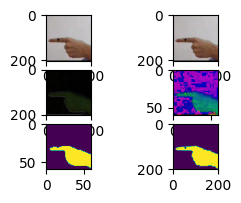

In [43]:
from skimage import io
from skimage.filters import sobel, gaussian, median
from skimage.morphology import disk
from matplotlib import pyplot as plt
import cv2
img = io.imread(r"D:\Programming\VS Code\Python\pdc\trainData\l.jpg")
plt.figure(figsize = (3, 2))
plt.subplot(321)
plt.imshow(img)

plt.subplot(322)
plt.imshow(img)
img1 = sobel(img)
io.imsave(r"D:\Programming\VS Code\Python\pdc\trainData\lsave.jpg", img)
plt.subplot(323)
plt.imshow(img1)
img = cv2.imread(r"D:\Programming\VS Code\Python\pdc\trainData\lsave.jpg")
img = cv2.resize(img, (60,60))
img4 = cv2.imread(r"D:\Programming\VS Code\Python\pdc\trainData\l.jpg")

img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2HSV)
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
min_HSV = np.array([0, 58, 30], dtype = "uint8")
max_HSV = np.array([33, 255, 255], dtype = "uint8")
img3 = cv2.inRange(img2, min_HSV, max_HSV)
img3 = median(img3, disk(3), mode = "constant", cval = 0.0)
img4 = cv2.inRange(img4, min_HSV, max_HSV)

plt.subplot(324)
plt.imshow(img2)
plt.subplot(325)
plt.imshow(img3)
plt.subplot(326)
plt.imshow(img4)
cv2.imshow('img3',img3)
print(img4)
with open(r"D:\Programming\VS Code\Python\pdc\trainData\img1.txt", 'w') as f:
    for i in img4:
        f.write(str(i)+'\n')
# img4 = cv2.medianBlur(img4,3)
img4 = median(img4, disk(3), mode = "constant", cval = 0.0)
print(img4)
with open(r"D:\Programming\VS Code\Python\pdc\trainData\img2.txt", 'w') as f:
    for i in img4:
        f.write(str(i)+'\n')
cv2.imshow('img4',img4)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
import cv2
import numpy as np
f = cv2.imread(r"D:\Programming\VS Code\Python\pdc\trainData\f.jpg")
f2 = cv2.cvtColor(f,cv2.COLOR_BGR2YCR_CB)
f = cv2.resize(f, (60,60))

f = cv2.cvtColor(f, cv2.COLOR_BGR2HSV)
# min_HSV = np.array([0, 58, 30], dtype = "uint8")b
# max_HSV = np.array([33, 255, 255], dtype = "uint8")
min_HSV = np.array([0, 58, 50]    ,dtype = "uint8")
max_HSV = np.array([30, 255, 255] , dtype = "uint8")

min_ycrb = np.array([0,133,77],np.uint8)
max_ycrb = np.array([235,173,127],np.uint8)

# [0, 58, 50]    
# [30, 255, 255] 
f2 = cv2.inRange(f2, min_ycrb, max_ycrb)
f = cv2.inRange(f, min_HSV, max_HSV)


f1 = f.copy()
r = 0
for i in f1[:-1]:
    if 255 in i:
        ind = np.where(i==255)
        for j in ind[0][:-1]:
            f1[r][j-1]=f1[r][j+1]=f1[r-1][j]=f1[r-1][j-1]=f1[r-1][j+1]=255
    r += 1
    
maxfing=0
# for i in f1:
#     fing=1
#     if 255 in i:
#         ind = np.where(i==255)
#         prev = ind[0][0]
#         for j in ind[0]:
#             if j-prev > 2:
#                 fing += 1
#             prev = j
#   maxfing = max(maxfing, fing)

for i in f[:20]:
    fing=1
    if 255 in i:
        ind = np.where(i==255)[0]
        ln = ind.shape[0]
        for j in range(ln-4):
            # print(1)
            if [ind[j], ind[j+1], ind[j+2], ind[j+3]] == [ind[j], ind[j]+1, ind[j]+2, ind[j]+3]:
                # print(2)
                fing += 1
    maxfing = max(maxfing, fing)
        # prev = mid

        # print(len(ind[0]))
    # r+=1
print("MAX FING COUNT : ",maxfing)

cv2.imshow('f1', f1)

cv2.imshow('f2', f2)
cv2.imshow('frame', f)
cv2.waitKey(0)

cv2.destroyAllWindows()

MAX FING COUNT :  1


In [4]:
import os, cv2
import numpy as np

def preprocess(action_frame):

    blur = cv2.GaussianBlur(action_frame, (3,3), 0)
    hsv = cv2.cvtColor(blur, cv2.COLOR_RGB2HSV)

    lower_color = np.array([108, 23, 82])
    upper_color = np.array([179, 255, 255])

    mask = cv2.inRange(hsv, lower_color, upper_color)P
    blur = cv2.medianBlur(mask, 5)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (8, 8))
    hsv_d = cv2.dilate(blur, kernel)

    return hsv_d

image = cv2.imread(r"D:\Programming\VS Code\Python\pdc\trainData\f.jpg")

# Covers both range
lower = np.array([0, 30, 53], dtype = "uint8")
upper = np.array([20, 180, 255], dtype = "uint8")

lower2 = np.array([172, 30, 53], dtype = "uint8")
upper2 = np.array([180, 180, 210], dtype = "uint8")

converted = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

skinMask = cv2.inRange(converted, lower, upper)
skinMask2 = cv2.inRange(converted, lower2, upper2)

#Gaussian Blur
skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)
skinMask2 = cv2.GaussianBlur(skinMask2, (3, 3), 0)

skin1 = cv2.bitwise_and(image, image, mask = skinMask)
skin2 = cv2.bitwise_and(image, image, mask = skinMask2)
skin = cv2.bitwise_or(skin1,skin2) #adding both ranges

# img = preprocess(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# img = preprocess(image)

# show the skin in the image along with the mask
cv2.imshow("images", np.hstack([image, skin]))
# cv2.imshow('img', img)
cv2.imshow('img1', skinMask)
cv2.imshow('img2', skinMask2)
cv2.waitKey(0)
cv2.destroyAllWindows()
